# **Header Files**

In [0]:
#Dataset link

csv_url="https://raw.githubusercontent.com/samarth1107/GMB_Project/master/Simulated_data_ageing.csv"
top_100_expressed="https://raw.githubusercontent.com/samarth1107/GMB_Project/master/top100.txt"
last_100_expressed="https://raw.githubusercontent.com/samarth1107/GMB_Project/master/last100.txt"

In [0]:
#Header files

%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import pearsonr
from scipy.special import ndtr as ndtr
from scipy import stats
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import operator 
import copy
import math 
import urllib3
urllib3.disable_warnings()
from google.colab import files
from IPython.display import Image

In [55]:
# no need to run this cell
image=files.upload()

Saving result summary.png to result summary.png


In [0]:
#Pandas reader normal data no opertion done

df = pd.read_csv(csv_url)

# **Calculations**

In [0]:
# Grp wise (A,B,C,D) mean column_mean[4][13911]

column_mean=[]
for col in range(0,4):
  column_mean.append([])
  for row in range(0,len(df.iloc[:,0])):
    column_mean[col].append((df.iloc[row][3*col+1]+df.iloc[row][3*col+2]+df.iloc[row][3*col+3])/3)


In [0]:
# to add grp wise mean to dataframe

df["Mean A"]=column_mean[0]
df["Mean B"]=column_mean[1]
df["Mean C"]=column_mean[2]
df["Mean D"]=column_mean[3]

In [0]:
# all grp is considered here
# mean of gene expression across dataset


all_mean=[]
for row in range(0,len(df.iloc[:,0])):
  all_mean.append((column_mean[0][row]+column_mean[1][row]+column_mean[2][row]+column_mean[3][row])/4)

In [0]:
# Grp wise (A,B,C,D) varience ( column_variance[4][13911] )

column_varience=[]
for column in range(0,4):
  column_varience.append([])
  for row in range(0,len(df.iloc[:,0])):
    column_varience[column].append(np.var([df.iloc[row][3*column+1],df.iloc[row][3*column+2],df.iloc[row][3*column+3]]))

In [0]:
# Grp wise (A,B,C,D) standard deviation ( column_standard_deviation[4][13911] )

column_standard_deviation=[]
for i in range(0,4):
  column_standard_deviation.append(np.sqrt(column_varience[i]))
  

In [73]:
#Mean of SD of grps

SD_mean=[]
for i in column_standard_deviation:
  SD_mean.append(np.median(i))
print("Grp SD mean ",SD_mean)
print("total mean : ",np.mean(SD_mean))

Grp SD mean  [0.5616729277395838, 0.4582475095586082, 0.5502381806242334, 0.7064166933191771]
total mean :  0.5691438278104006


In [0]:
# T test and p value 
# making Normalised P value by -log10  
# t test is done on A1 A2 A3 and D1 D2 D3

t_test=[]
p_value=[]
for row in range(df.shape[0]):
  t_test.append(stats.ttest_ind([df["A_1"][row],df["A_2"][row],df["A_3"][row]],[df["D_1"][row],df["D_2"][row],df["D_3"][row]],equal_var=False)[0])
  p_value.append(stats.ttest_ind([df["A_1"][row],df["A_2"][row],df["A_3"][row]],[df["D_1"][row],df["D_2"][row],df["D_3"][row]],equal_var=False)[1])

df["T test"]=t_test
df["P value"]=p_value
df["Normalized P value"]=np.multiply(np.log10(df["P value"]),-1)

In [80]:
# Grp wise (A,B,C,D) Coefficient of variation

Column_coefficient_variation=[]
for col in range(4):
  Column_coefficient_variation.append([])
  for row in range(len(df.iloc[:,0])):
    if column_mean[col][row]>0:Column_coefficient_variation[col].append(column_standard_deviation[col][row]/column_mean[col][row])
    else:Column_coefficient_variation[col].append(0)

# To find difference between CV of A and D

Difference_dict={}
for row in range(len(df.iloc[:,0])):
  if df["P value"][row]<=0.05:
    Difference_dict[df.iloc[:,0][row]]=abs(Column_coefficient_variation[0][row]-Column_coefficient_variation[3][row])  

print(len(Difference_dict)," Genes selected from ",len(df.iloc[:,0])," according to CV difference and P value")

Difference_dict=dict(sorted(Difference_dict.items(), key=lambda kv: kv[1]))
Sorted_Gene_name_list=[]
for genename in Difference_dict:
  Sorted_Gene_name_list.append(genename)

Top_gene=[]
Bottom_gene=[]
loop=0
for gene in range(len(Sorted_Gene_name_list)):
  Top_gene.append(Sorted_Gene_name_list[gene])
  Bottom_gene.append(Sorted_Gene_name_list[len(Sorted_Gene_name_list)-1-gene])
  loop+=1
  if loop>99:break

print("Top expressed genes are : ",Top_gene)
print("Last expressed genes are : ",Bottom_gene)

3334  Genes selected from  13911  according to CV difference and P value
Top expressed genes are :  ['CYTH3(3of3)', 'SMURF2(2of2)', 'RDH13', 'MACF1(1of2)', 'ZNF41', 'COG5', 'PWP2H', 'FAM204A', 'RAB10', 'ERGIC3', 'RPL18', 'CYB5B', 'PPP1R9A(2of2)', 'UBXN4', 'RINT1', 'SI:CH73-236E11.2', 'CUL5', 'SEC23A', 'COPB2', 'GALT(2of2)', 'PARP11(1of2)', 'RNF144A', 'ZNF235(10of128)', 'CPSF6', 'PHACTR4(2of2)', 'MARCH7(2of2)', 'ST7L(1of2)', 'MICAL1', 'SPIRE1A(1of2)', 'NUDT3', 'RBM4.1', 'DHX15(2of2)', 'RNF145B', 'SPG20B', 'MTA1(2of2)', 'KIF27', 'NEU1', 'ZNF850(2of2)', 'GPS2', 'FAM175B', 'TMEM39A', 'GRIP2A', 'PSD(1of2)', 'BAMBIA', 'SF3B2', 'DNAJA2(1of2)', 'TOP3A', 'RFESD(1of3)', 'UBR5(4of4)', 'TMCC1(1of2)', 'DMBT1(1of2)', 'KATNAL2', 'NUP133(2of2)', 'IAH1', 'U2AF2B(2of2)', 'DNAJC1', 'CIT(6of6)', 'DCAF11', 'PRNPB', 'FBXW11B', 'FUBP3(2of4)', 'CACNA1G(2of14)', 'XRCC6BP1', 'ITPR2(3of4)', 'ETNK2(1of2)', 'B3GNT2B', 'DKC1', 'CIZ1A(2of2)', 'MUT', 'NRDE2(1of3)', 'SIRT6', 'PTGES', 'CRLS1', 'RAB5C(2of2)', 'ROCK2(1of


```
# Without normalizing
Mean of Standard deviation
0 - 2.771 
1 - 2.34
2 - 2.84
3 - 3.64
all - 2.92

Median of Standard deviation
0 - 0.56
1 - 0.45
2 - 0.55
3 - 0.70

Sum of Standard deviation
0 - 38625.891803538456
1 - 32664.435965289544
2 - 39552.28616047585
3 - 50690.595982032
```
 

# **Graphs**

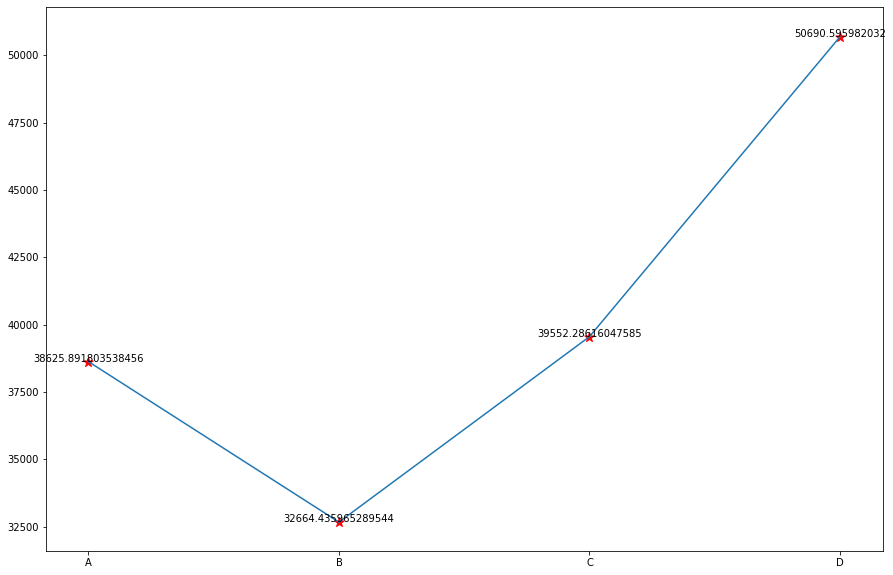

In [0]:
# Sum of SD of grps
changes=[]
for i in range(0,4):
  changes.append(np.sum(column_standard_deviation[i]))

# Graph
plt.plot(changes)
plt.scatter(["A","B","C","D"],changes,marker="*",s=100,color="red")
x=0
for point in changes:
  plt.text(x,point,point,horizontalalignment='center')
  x=x+1
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

30.40797475232083   -24.854687166448
23.174070276801874   -18.477867852060367
27.863281111372643   -22.176804774592277
36.14341231476551   -28.85556874032342


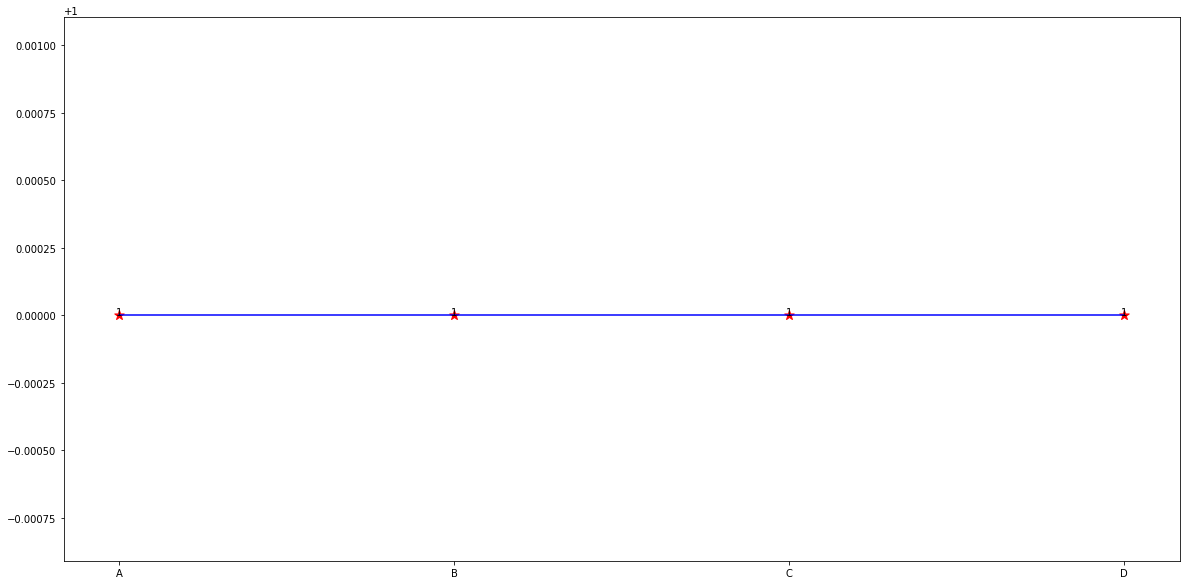

In [77]:
#in this method we will see how many SD of gene are more than threshold value
changes=[0,0,0,0]


for i in range(0,4):
  threshold_1=np.mean(column_standard_deviation[i])+np.std(column_standard_deviation[i])
  threshold_2=np.mean(column_standard_deviation[i])-np.std(column_standard_deviation[i])
  print(threshold_1," ",threshold_2)
  
  for ch in column_standard_deviation[i]:
    if ch<threshold_1 and ch>threshold_2:
      changes[i]=+1


# Graph
plt.plot(changes,color="blue")
plt.scatter(["A","B","C","D"],changes,marker="*",s=100,color="red")
x=0
for point in changes:
  plt.text(x,point,point,horizontalalignment='center')
  x=x+1
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

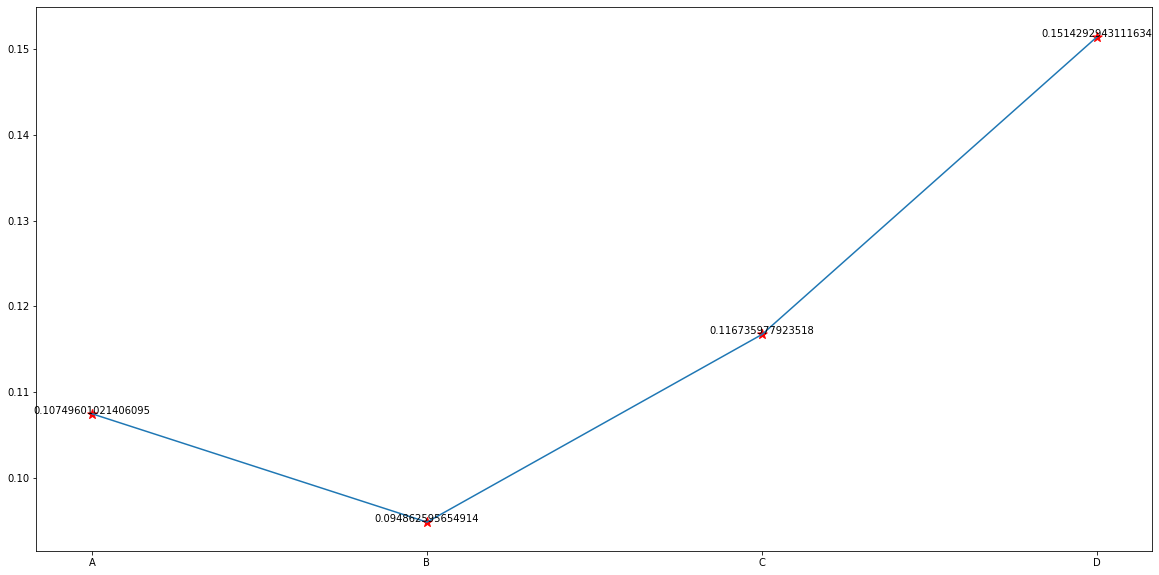

In [0]:
# Normalised SD (grp SD/ whole gene mean)

normalised_standard_deviation=[]
for col in range(0,len(column_standard_deviation)):
  normalised_standard_deviation.append([])
  for row in range(0,len(column_standard_deviation[0])):
    normalised_standard_deviation[col].append(column_standard_deviation[col][row]/all_mean[row])
# Mean of normalised grp SD
changes=[]
for i in range(0,4):
  changes.append(np.mean(normalised_standard_deviation[i]))


# Graph
plt.plot(changes)
plt.scatter(["A","B","C","D"],changes,marker="*",s=100,color="red")
x=0
for point in changes:
  plt.text(x,point,point,horizontalalignment='center')
  x=x+1
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

21  Genes are up regulated and satisfy conditions for DGE
27  Genes are down regulated and satisfy conditions for DGE


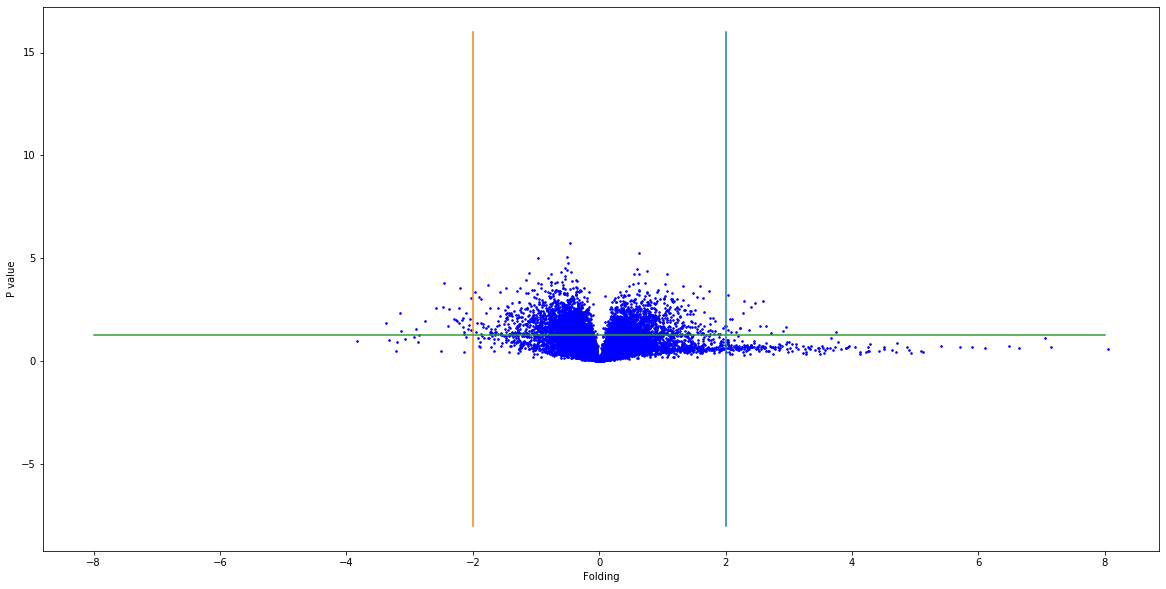

In [0]:
# to calculate fold b/w A and D run it single time otherwise error will come

to_del=[2529,3175,3755,5871,6726,11428,13771] # Mean A = 0
df=df.drop(to_del)
to_del=[3140,3174,3881,8583,9422,9705,12696] # Mean D = 0
df=df.drop(to_del)
df["Fold D/A"]=np.log2(df["Mean D"]/df["Mean A"])


#DGE calculation

DGE_up=[]
DGE_down=[]

DGE_up.append(df.loc[(df["Fold D/A"] >=2 ) & (df["Normalized P value"] >= 1.301),"gene_short_name"].values.tolist())

DGE_up = [item for sublist in DGE_up for item in sublist] # to flat list
up_regulated=len(DGE_up)
print(up_regulated," Genes are up regulated and satisfy conditions for DGE")


DGE_down.append(df.loc[(df["Fold D/A"] <=-2 ) & (df["Normalized P value"] >= 1.301),"gene_short_name"].values.tolist())

DGE_down = [item for sublist in DGE_down for item in sublist] # to flat list
down_regulated=len(DGE_down)
print(down_regulated," Genes are down regulated and satisfy conditions for DGE")



# Calculating fold up and down value for selected genes

fold_value_up=[]
fold_value_down=[]
fold_value_up.append(df.loc[(df["Fold D/A"] >=2 ) & (df["Normalized P value"] >= 1.301),"Fold D/A"].values.tolist())
fold_value_down.append(df.loc[(df["Fold D/A"] <=-2 ) & (df["Normalized P value"] >= 1.301),"Fold D/A"].values.tolist())

fold_value_up = [item for sublist in fold_value_up for item in sublist] 
fold_value_down = [item for sublist in fold_value_down for item in sublist] 


# Making dictionary with key of name of selected gene and corresponding fold value as there value 

Up_regulate=dict(zip(DGE_up,fold_value_up))
Down_regulate=dict(zip(DGE_down,fold_value_down))


# Sorting folding value dictionary according to their fold value

Sorted_Up_regulate=dict(sorted(Up_regulate.items(), key=lambda kv: kv[1]))
Sorted_Down_regulate=dict(sorted(Down_regulate.items(), key=lambda kv: kv[1]))


# Graph
plt.scatter(df["Fold D/A"],df["Normalized P value"],marker=".",s=10,color="blue")
plt.plot([2,2],[-8,16])
plt.plot([-2,-2],[-8,16])
plt.plot([-8,8],[1.301,1.301])
plt.xlabel('Folding') 
plt.ylabel('P value') 
plt.rcParams['figure.figsize'] = [20,10]
plt.show()


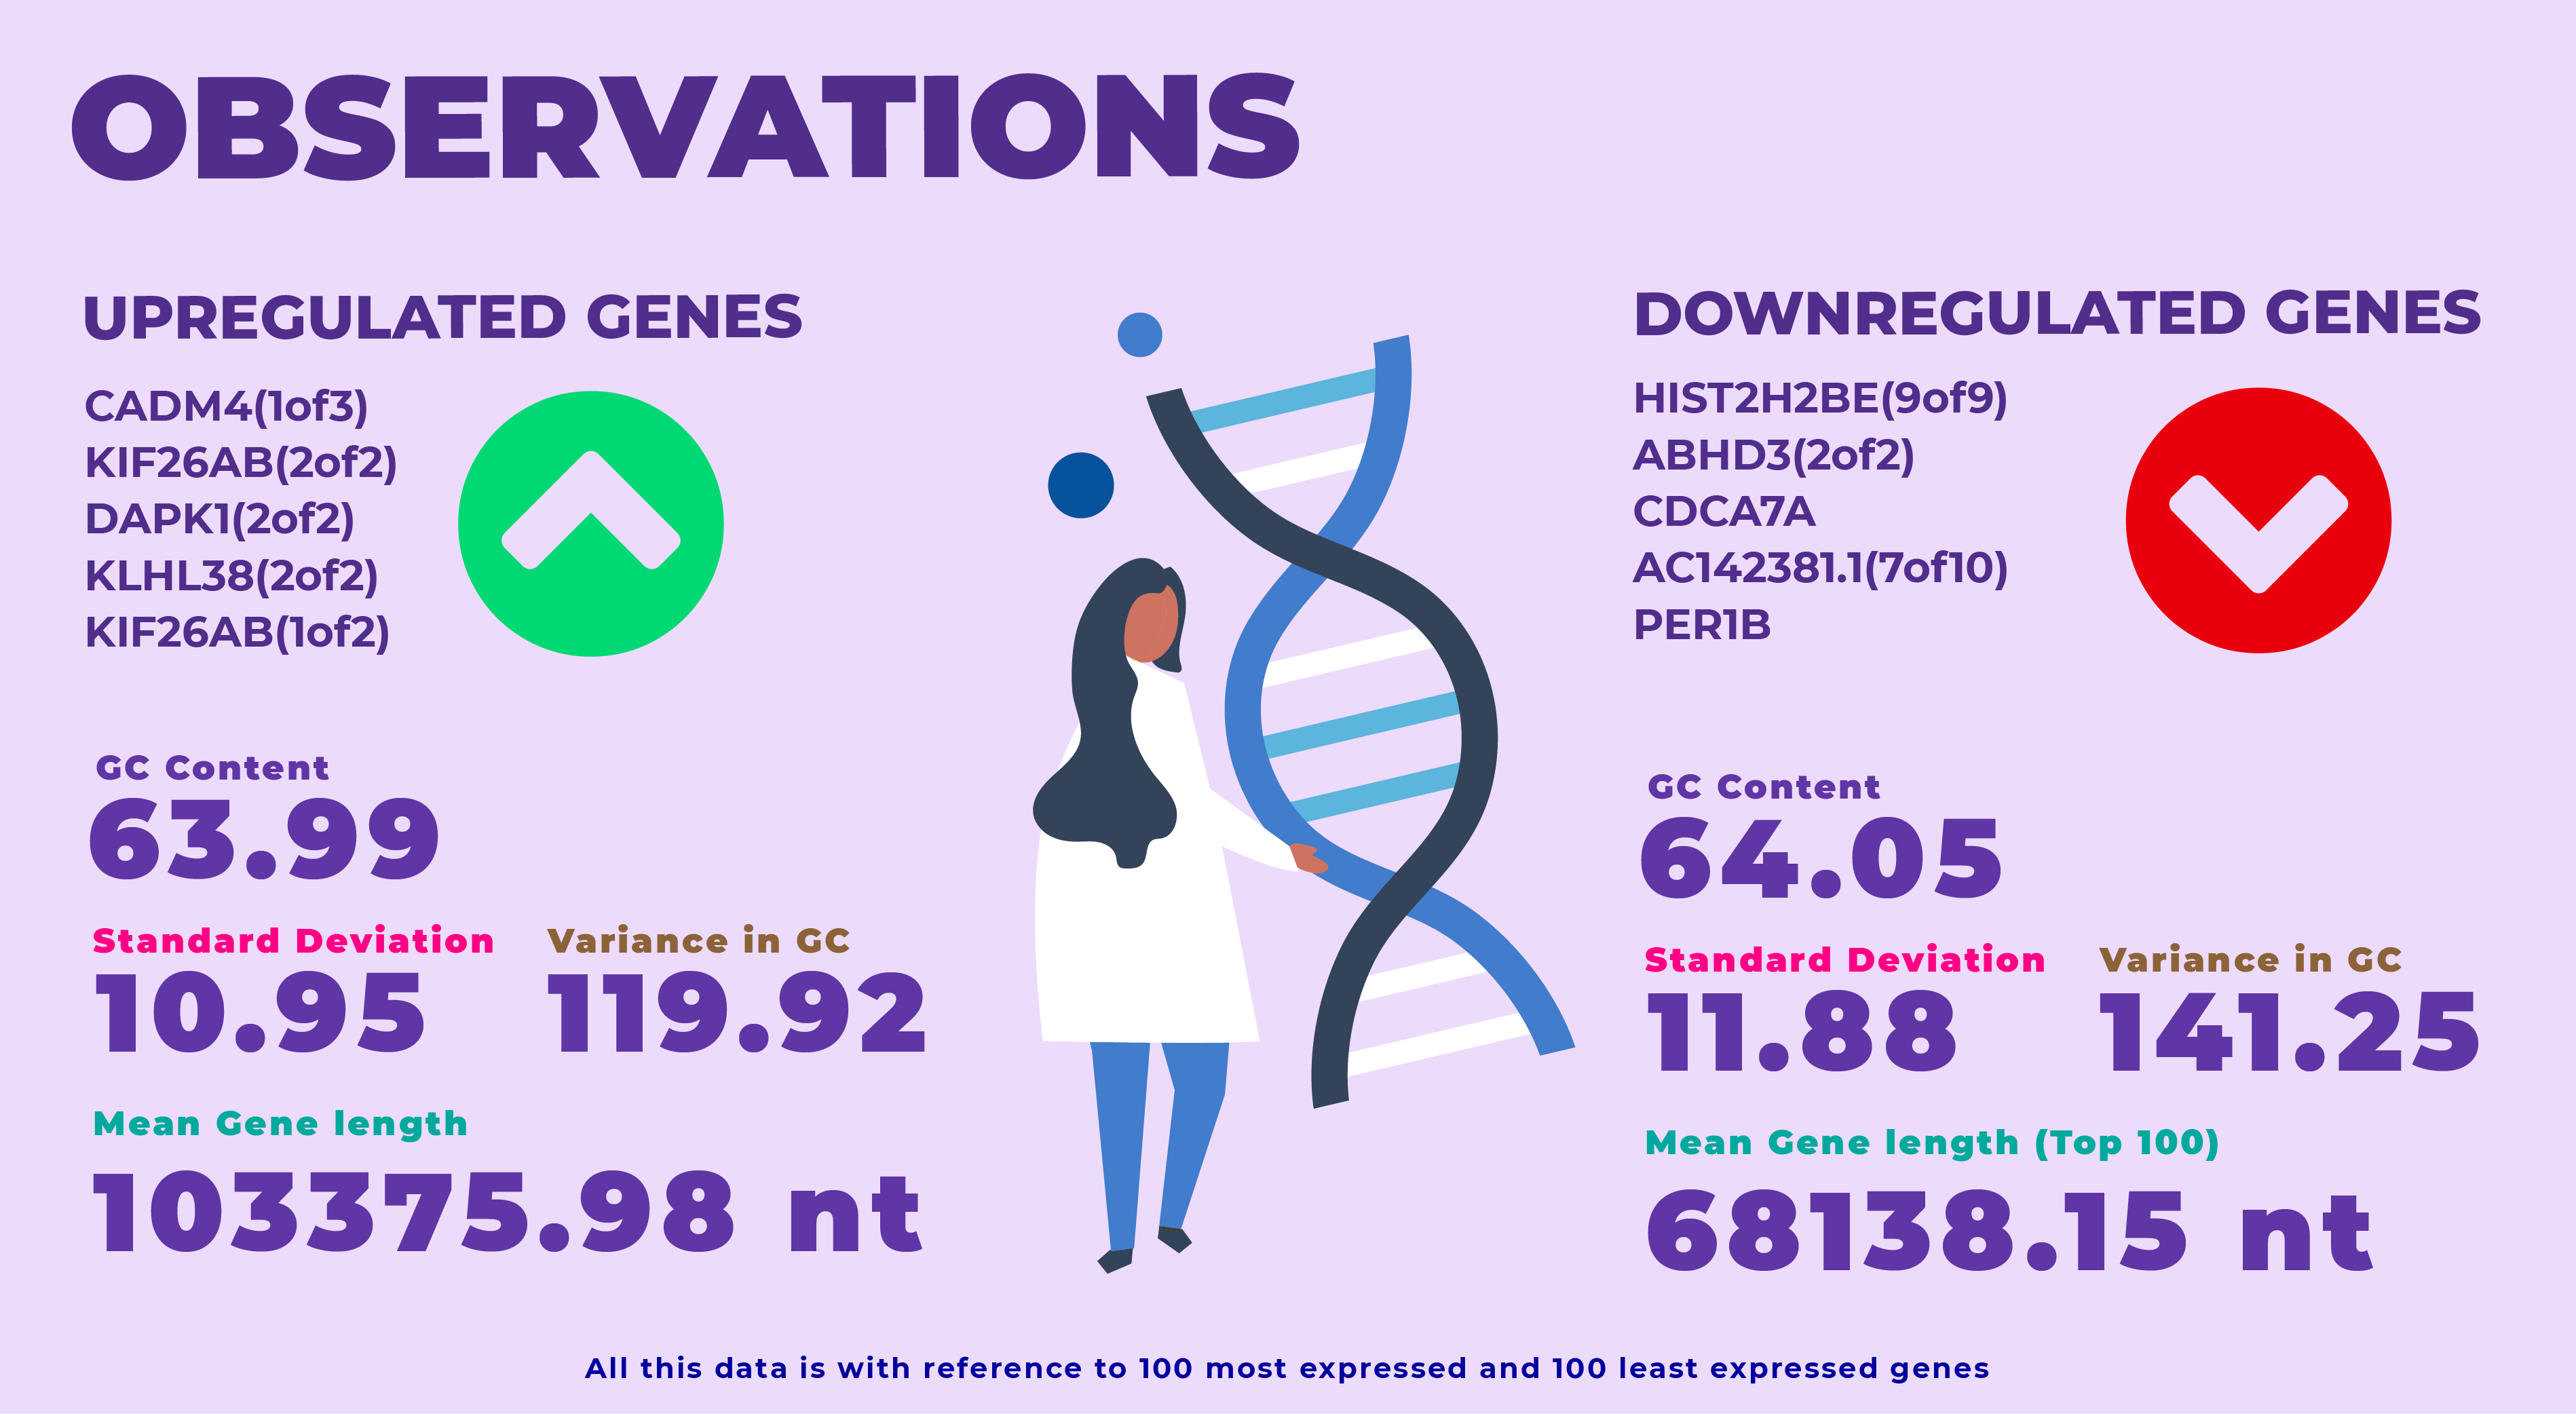

In [65]:
Image("result summary.png",width=1300,height=800)